In [1]:
using CSV, DataFrames, Queryverse

In [21]:
println("https://www.ssa.gov/oact/babynames/state/namesbystate.zip")

https://www.ssa.gov/oact/babynames/state/namesbystate.zip


In [22]:
;curl -o namesbystate.zip https://www.ssa.gov/oact/babynames/state/namesbystate.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.4M  100 21.4M    0     0  5375k      0  0:00:04  0:00:04 --:--:-- 5375k


In [23]:
;unzip namesbystate.zip -d baby_data

Archive:  namesbystate.zip


replace baby_data/AK.TXT? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [24]:
;head baby_data/WY.TXT

WY,F,1910,Mary,27
WY,F,1910,Margaret,22
WY,F,1910,Helen,13
WY,F,1910,Alice,10
WY,F,1910,Dorothy,9
WY,F,1910,Frances,8
WY,F,1910,Josephine,8
WY,F,1910,Lena,8
WY,F,1910,Anna,7
WY,F,1910,Ruth,7


In [25]:
;tail baby_data/AL.TXT

AL,M,2019,Walton,5
AL,M,2019,Waylen,5
AL,M,2019,Westyn,5
AL,M,2019,Whitaker,5
AL,M,2019,Wylder,5
AL,M,2019,Zaire,5
AL,M,2019,Zakari,5
AL,M,2019,Zaylon,5
AL,M,2019,Zayvion,5
AL,M,2019,Zylon,5


In [26]:
;grep -n -i -w Gregg baby_data/AL.TXT

92573:AL,M,1948,Gregg,6
93173:AL,M,1949,Gregg,5
95204:AL,M,1953,Gregg,7
96914:AL,M,1956,Gregg,5
97310:AL,M,1957,Gregg,9
98541:AL,M,1959,Gregg,5
98897:AL,M,1960,Gregg,12
99516:AL,M,1961,Gregg,9
100025:AL,M,1962,Gregg,10
100531:AL,M,1963,Gregg,13
101103:AL,M,1964,Gregg,10
102088:AL,M,1966,Gregg,11
102721:AL,M,1967,Gregg,5
104215:AL,M,1970,Gregg,5


In [27]:
using Glob

In [28]:
files = glob("baby_data/*.TXT")

51-element Vector{String}:
 "baby_data/AK.TXT"
 "baby_data/AL.TXT"
 "baby_data/AR.TXT"
 "baby_data/AZ.TXT"
 "baby_data/CA.TXT"
 "baby_data/CO.TXT"
 "baby_data/CT.TXT"
 "baby_data/DC.TXT"
 "baby_data/DE.TXT"
 "baby_data/FL.TXT"
 "baby_data/GA.TXT"
 "baby_data/HI.TXT"
 "baby_data/IA.TXT"
 ⋮
 "baby_data/RI.TXT"
 "baby_data/SC.TXT"
 "baby_data/SD.TXT"
 "baby_data/TN.TXT"
 "baby_data/TX.TXT"
 "baby_data/UT.TXT"
 "baby_data/VA.TXT"
 "baby_data/VT.TXT"
 "baby_data/WA.TXT"
 "baby_data/WI.TXT"
 "baby_data/WV.TXT"
 "baby_data/WY.TXT"

In [29]:
df = DataFrame.(CSV.File.(files[1], header=false))

,Column1,Column2,Column3,Column4,Column5
,String,String,Int64,String,Int64
1,AK,F,1910,Mary,14
2,AK,F,1910,Annie,12
3,AK,F,1910,Anna,10
4,AK,F,1910,Margaret,8
5,AK,F,1910,Helen,7
6,AK,F,1910,Elsie,6
7,AK,F,1910,Lucy,6
8,AK,F,1910,Dorothy,5
9,AK,F,1911,Mary,12


In [30]:
typeof(df)

DataFrame

In [31]:
df = DataFrame()

for file in files
    xf = DataFrame(CSV.File.(file, header=false))
    df = append!(df, xf)
end

In [32]:
typeof(df)

DataFrame

In [34]:
first(df, 5)

,Column1,Column2,Column3,Column4,Column5
,String,String,Int64,String,Int64
1,AK,F,1910,Mary,14
2,AK,F,1910,Annie,12
3,AK,F,1910,Anna,10
4,AK,F,1910,Margaret,8
5,AK,F,1910,Helen,7


In [35]:
last(df, 5)

,Column1,Column2,Column3,Column4,Column5
,String,String,Int64,String,Int64
1,WY,M,2019,Theo,5
2,WY,M,2019,Tristan,5
3,WY,M,2019,Vincent,5
4,WY,M,2019,Warren,5
5,WY,M,2019,Waylon,5


In [36]:
size(df)

(6122890, 5)

In [37]:
df = rename(df,
    :Column1 => :State,
    :Column2 => :Gender,
    :Column3 => :Period,
    :Column4 => :Name,
    :Column5 => :Total
)

,State,Gender,Period,Name,Total
,String,String,Int64,String,Int64
1,AK,F,1910,Mary,14
2,AK,F,1910,Annie,12
3,AK,F,1910,Anna,10
4,AK,F,1910,Margaret,8
5,AK,F,1910,Helen,7
6,AK,F,1910,Elsie,6
7,AK,F,1910,Lucy,6
8,AK,F,1910,Dorothy,5
9,AK,F,1911,Mary,12


In [38]:
unique(df.Gender)

2-element Vector{String}:
 "F"
 "M"

In [39]:
sum(df.Total)

314092866

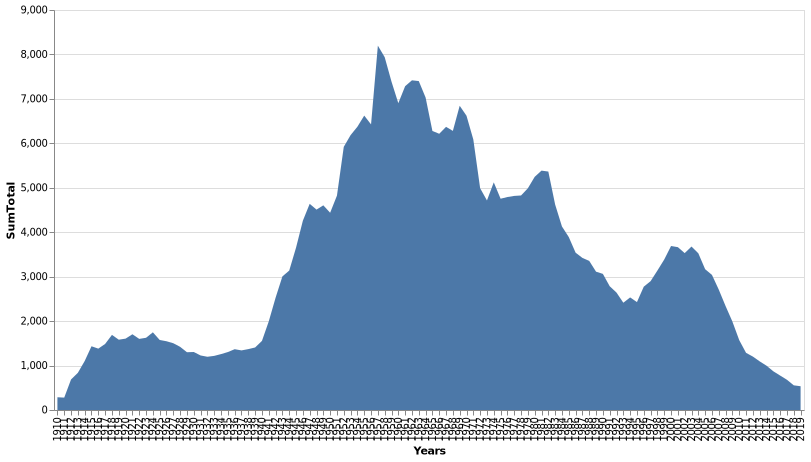

In [61]:
df |>
    @filter(_.Name == "Leslie") |>
    @groupby(_.Period) |>
    @map({Years=key(_), SumTotal=sum(_.Total)}) |>
    @orderby(_.Years) |>
    @vlplot(:area, x="Years:n", y="SumTotal:q", width=750, height=400)

In [56]:
year_range = 1970:2020

1970:2020

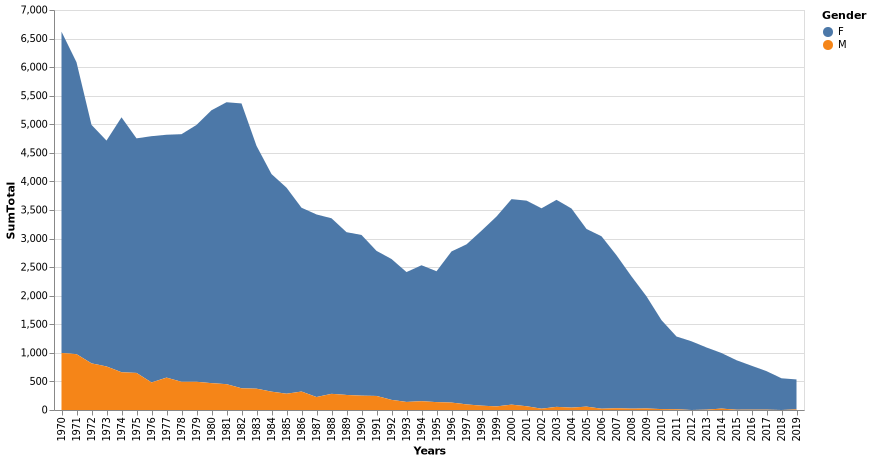

In [62]:
df |>
    @filter(_.Period >= 1970) |>
    @filter(_.Name == "Leslie") |>
    @groupby({_.Gender, _.Period}, _.Total) |>
    @map({Gender=key(_)[1], Years=key(_)[2], SumTotal=sum(_)}) |>
    @orderby(_.Years) |>
    @vlplot(:area, x="Years:o", y="SumTotal:q", color="Gender:n", width=750, height=400)